In [1]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [2]:
# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [4]:
X.shape, y.shape

((150, 2), (150,))

In [5]:
# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=5)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0....',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft',
         weights=[2, 1, 2])

In [6]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1)) # 产生所有需要用来预测的数据点

(0, 0)
(0, 1)
(1, 0)
(1, 1)


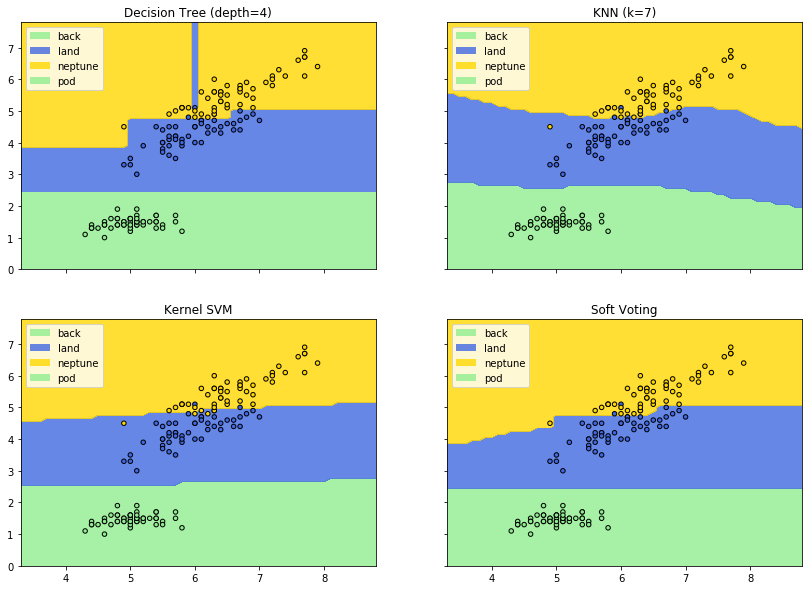

In [17]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(14, 10)) # 一个需要画出四张图

colors = ['lightgreen', 'royalblue', 'gold'] # 每一种分类的颜色
index2colors = {0:'lightgreen', 1:'royalblue', 2:'gold'}

for idx, clf, tt in zip(product([0, 1], [0, 1]), [clf1, clf2, clf3, eclf], ['Decision Tree (depth=4)', 'KNN (k=7)','Kernel SVM', 'Soft Voting']):
    print(idx)
    # clf表示分类器
    # tt表示图像的名字
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # 展平所有的xx和yy, 接着拼接在一起, 当作输入进行预测
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, levels=[-0.5,0.5,1.5,2.5,3.5], colors=colors, alpha=0.8)
    # 绘制图例
    proxy = [plt.Rectangle((0,0), 1, 1, fc = pc.get_facecolor()[0]) for pc in axarr[idx[0], idx[1]].collections]
    axarr[idx[0], idx[1]].legend(proxy, ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop'])
    # 绘制散点图
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=[index2colors.get(i) for i in y], s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()